In [24]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df=pd.read_csv('/content/drive/MyDrive/dataset_sma/flipkart_review_data_2022_02.csv')

<ipython-input-27-cb98caaa677b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')


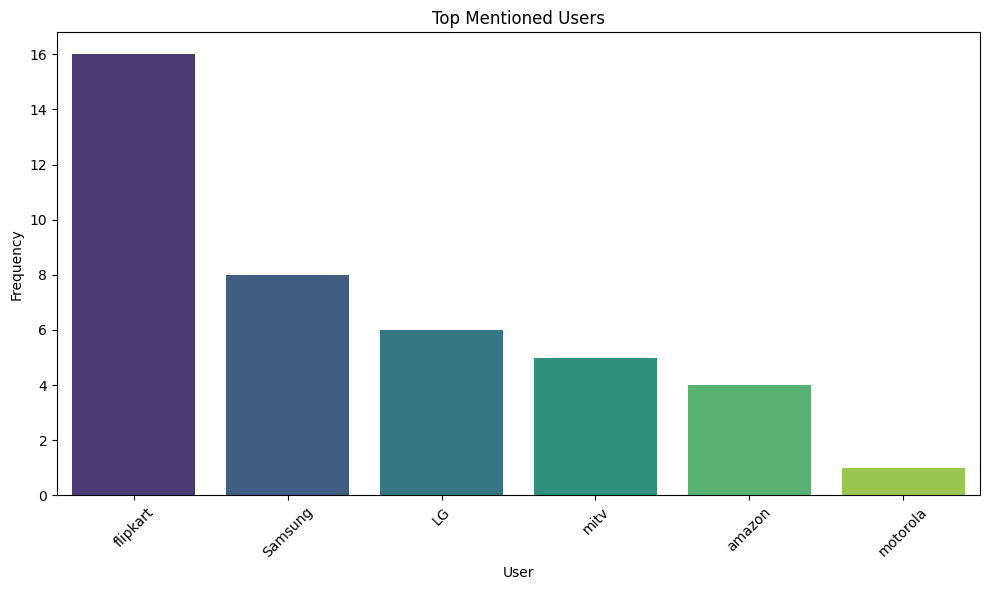

    Mention  Frequency
0  flipkart         16
1   Samsung          8
2        LG          6
3      mitv          5
4    amazon          4
5  motorola          1


In [27]:
# Define a function to extract mentions from text
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

# Apply the function to the 'Text' column to extract mentions
df['Mentions'] = df['reviewDescription'].apply(extract_mentions)

# Flatten the 'Mentions' column to create a list of all mentions
all_mentions = [mention for sublist in df['Mentions'].tolist() for mention in sublist]

# Create a DataFrame to count the frequency of each mention
mentions_df = pd.DataFrame(all_mentions, columns=['Mention'])
mention_counts = mentions_df['Mention'].value_counts().reset_index()
mention_counts.columns = ['Mention', 'Frequency']

# Plotting the top mentioned users
top_mentions = mention_counts  # Get top 5 mentioned users for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')
plt.title('Top Mentioned Users')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the frequency of each mention
print(mention_counts)


In [28]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
geolocator = Nominatim(user_agent="my_geocoder")

<ipython-input-30-f334613083d3>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


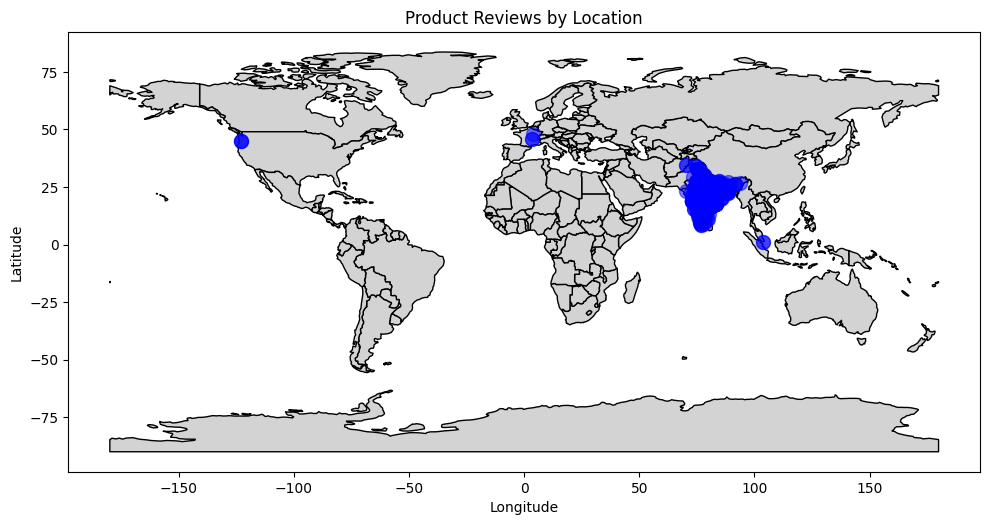

        reviewerLocation             Location   Latitude  Longitude
0                 Mumbai               Mumbai  19.081577  72.886628
1                 Mumbai               Mumbai  19.081577  72.886628
2               Haridwar             Haridwar  29.938447  78.145298
3              Allahabad            Allahabad  25.438130  81.833800
4      Hamirpur District    Hamirpur District  25.750000  80.000000
..                   ...                  ...        ...        ...
338    Kottayam District    Kottayam District   9.628738  76.645533
339   Kozhikode District   Kozhikode District  11.465594  75.891940
340                Jammu                Jammu  32.718561  74.858092
341             Jabalpur             Jabalpur  23.160894  79.949770
342    Balangir District    Balangir District  20.609518  83.167303

[341 rows x 4 columns]


In [30]:


# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['reviewerLocation']
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='blue', markersize=100, alpha=0.5)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


# Display the DataFrame with geocoded locations
print(df[['reviewerLocation', 'Location', 'Latitude', 'Longitude']])


<ipython-input-32-c2b2ce1c369b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')


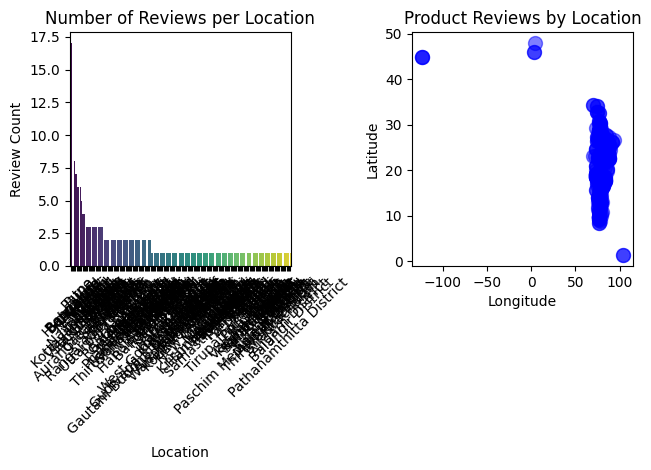

In [32]:
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']
plt.subplot(1, 2, 1)
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')
plt.title('Number of Reviews per Location')
plt.xlabel('Location')
plt.ylabel('Review Count')
plt.xticks(rotation=45)

# Plotting reviews on a map
plt.subplot(1, 2, 2)
plt.scatter(df['Longitude'], df['Latitude'], color='blue', s=100, alpha=0.5)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()